## TEST

In [200]:
# here we try to find the most importan features that affect sleep quality
# we use random forest to find the most important features
# we use the data from the previous step (data_preprocessing.ipynb)

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


# read the data
df = pd.read_csv('../data/data_combined_final.csv')

# drop the first column (index)
df.drop(df.columns[0], axis=1, inplace=True)
# drop the country column
df.drop('country', axis=1, inplace=True)

# since there is a lot of missing values in the data, we fill in missing values with the median (for numerical 
# values) or mode (for categorical values)
# numerical columns are :
# Steps, Socialize (min), Alcohol (bev), People contact, Worry (scale), PHQ9, 
# PANAS (NA),PANAS (PA), latency, Wakes, Sleeptime (h), 
# 
# Categorical columns are
# Leave house,Exercise, Stress, Worry (health), Worry (finances), Isolation, Student
# Age Group, Restfulness, Wakes (scale), Nervousness, Depression, Anxiety, 
# Insomnia,Exercise (scale),Food Healthiness, Alcohol, Age Group

# fill in missing values in the numerical columns using k-nearest neighbors
#
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df['Steps'] = imputer.fit_transform(df[['Steps']])
df['Socialize (min)'] = imputer.fit_transform(df[['Socialize (min)']])
df['Alcohol (bev)'] = imputer.fit_transform(df[['Alcohol (bev)']])
df['People contact'] = imputer.fit_transform(df[['People contact']])
df['Worry (scale)'] = imputer.fit_transform(df[['Worry (scale)']])
df['PHQ9'] = imputer.fit_transform(df[['PHQ9']])
df['PANAS (NA)'] = imputer.fit_transform(df[['PANAS (NA)']])
df['PANAS (PA)'] = imputer.fit_transform(df[['PANAS (PA)']])
df['Latency'] = imputer.fit_transform(df[['Latency']])
df['Wakes'] = imputer.fit_transform(df[['Wakes']])
df['Sleeptime (h)'] = imputer.fit_transform(df[['Sleeptime (h)']])




# fill in missing values with mode (for categorical values)
# 
df['Age Group'].fillna(df['Age Group'].mode()[0], inplace=True)
df['Leave house'].fillna(df['Leave house'].mode()[0], inplace=True)
df['Exercise'].fillna(df['Exercise'].mode()[0], inplace=True)
df['Stress'].fillna(df['Stress'].mode()[0], inplace=True)
df['Worry (health)'].fillna(df['Worry (health)'].mode()[0], inplace=True)
df['Worry (finances)'].fillna(df['Worry (finances)'].mode()[0], inplace=True)
df['Isolation'].fillna(df['Isolation'].mode()[0], inplace=True)
df['student'].fillna(df['student'].mode()[0], inplace=True)
df['Restfulness'].fillna(df['Restfulness'].mode()[0], inplace=True)
df['Wakes (scale)'].fillna(df['Wakes (scale)'].mode()[0], inplace=True)
df['Nervousness'].fillna(df['Nervousness'].mode()[0], inplace=True)
df['Depression'].fillna(df['Depression'].mode()[0], inplace=True)
df['Anxiety'].fillna(df['Anxiety'].mode()[0], inplace=True)
df['Insomnia'].fillna(df['Insomnia'].mode()[0], inplace=True)
df['Exercise (scale)'].fillna(df['Exercise (scale)'].mode()[0], inplace=True)
df['Food Healthiness'].fillna(df['Food Healthiness'].mode()[0], inplace=True)
df['Alcohol'].fillna(df['Alcohol'].mode()[0], inplace=True)



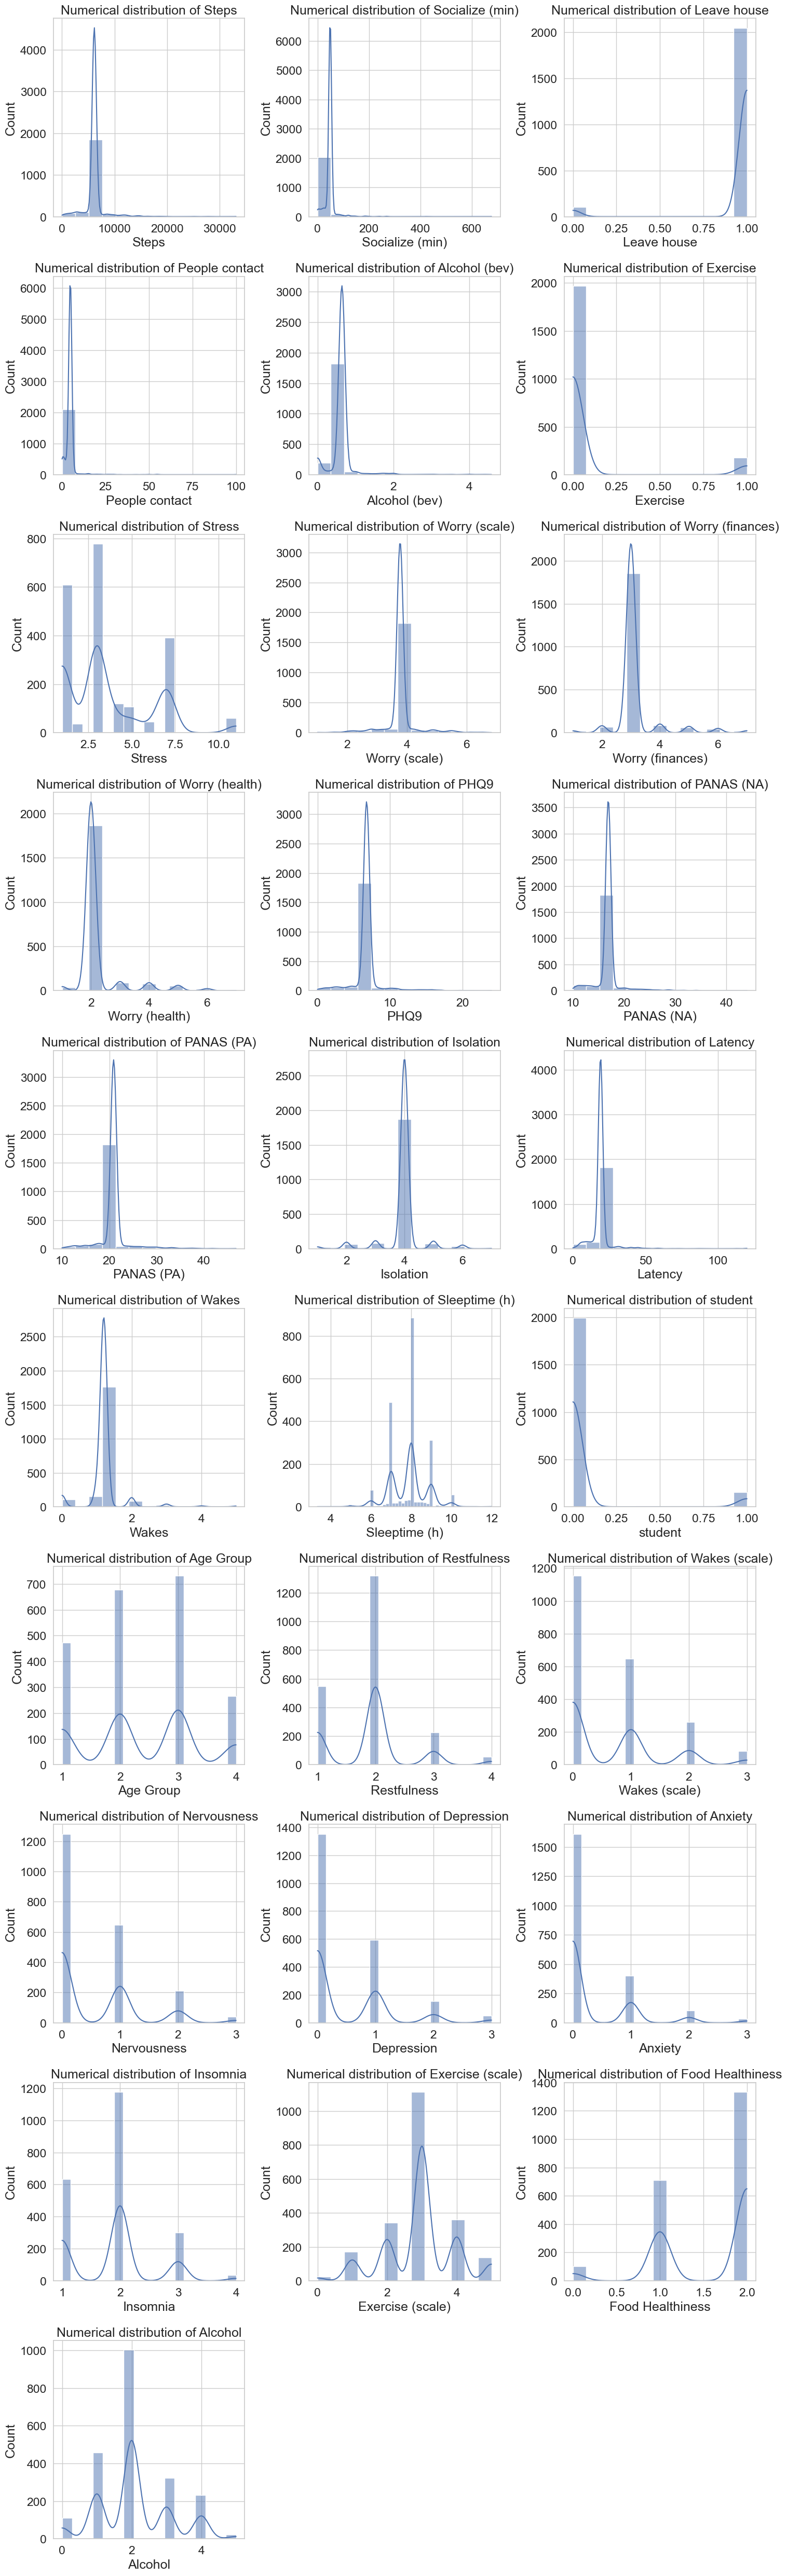

In [201]:
# plot the columns:
# Number of columns you have
n = len(df.columns)

# Setting up the grid
ncols = 3  # number of columns in the grid
nrows = n // ncols  # number of rows in the grid
if n % ncols != 0:  # add an extra row if needed
    nrows += 1

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the axes array to make indexing easier
axes = axes.flatten()

# Loop through all columns and corresponding subplot
for i, col in enumerate(df.columns):
    ax = axes[i]
    
    if df[col].dtype == 'object':  # Categorical Data
        sns.countplot(x=col, data=df, ax=ax)
        ax.set_title(f'Categorical distribution of {col}')
    else:  # Numerical Data
        sns.histplot(df[col], kde=True, ax=ax)
        ax.set_title(f'Numerical distribution of {col}')

# Remove any empty subplots
for i in range(n, nrows * ncols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [202]:
# target variable is the Restfulness and the features are all the other columns
y = df['Restfulness']
X = df.drop(['Restfulness'], axis=1)






In [203]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 42)

# fit the random forest classifier
rf_fit = RandomForestClassifier(random_state=0, class_weight='balanced' ).fit(X_train, y_train)

# get the feature importances
importances = rf_fit.feature_importances_

# sort the features by their importance
sorted_index = np.argsort(importances)[::-1]

# get the names of the features
labels = np.array(cols)[sorted_index]



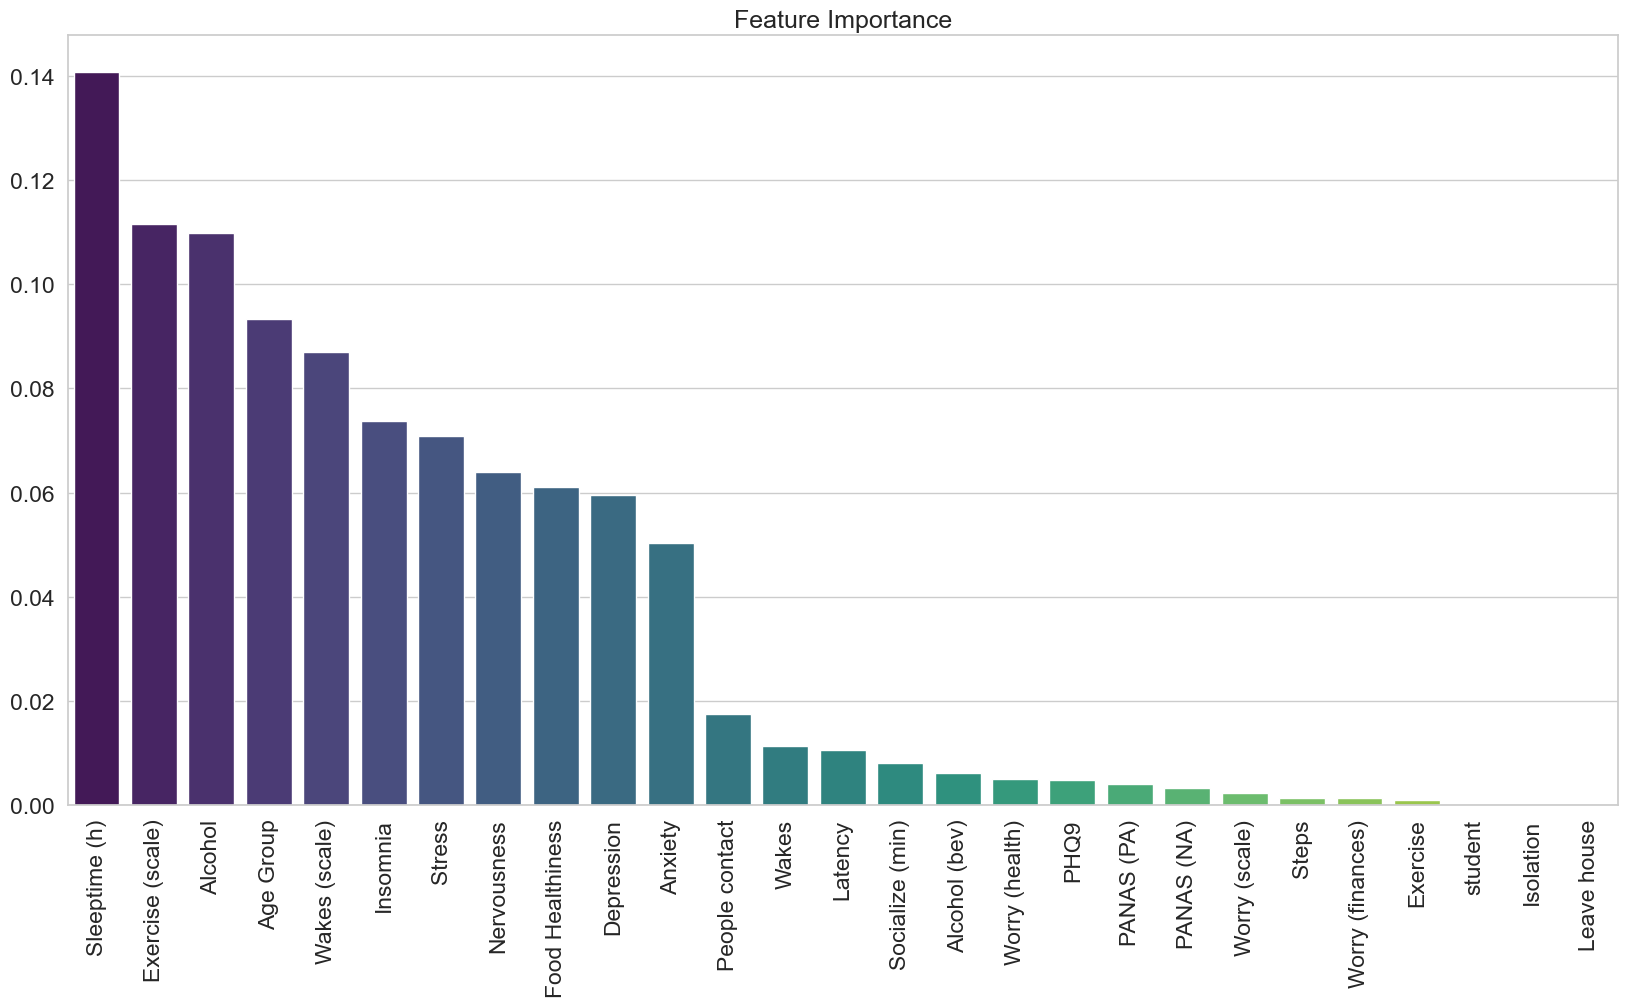

In [204]:
# plot the importance of the features
plt.figure(figsize=(20, 10))
sns.barplot(x=labels, y=importances[sorted_index], palette='viridis')
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.show()


In [205]:
# select the names features from the importance list under the threshold 0.01
important_features = labels[importances[sorted_index] > 0.01]

important_features

array(['Sleeptime (h)', 'Exercise (scale)', 'Alcohol', 'Age Group',
       'Wakes (scale)', 'Insomnia', 'Stress', 'Nervousness',
       'Food Healthiness', 'Depression', 'Anxiety', 'People contact',
       'Wakes', 'Latency'], dtype='<U16')

In [206]:
# now we will use the important features to train the model again

# target variable is the Restfulness and the features are all the other columns
y = df['Restfulness']
X = df[important_features]

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 42)
                                            
# fit the random forest classifier
rf_fit = RandomForestClassifier(random_state=0, class_weight='balanced' ).fit(X_train, y_train)

# predict the test set
y_pred = rf_fit.predict(X_test)

# get the confusion matrix
confusion_matrix(y_test, y_pred)


array([[ 39,  76,   2,   0],
       [ 57, 286,  17,   0],
       [  7,  24,  17,   0],
       [  2,  10,   0,   0]])

In [207]:
# accuracy of the model
print('Accuracy of the model is: ', rf_fit.score(X_test, y_test))


Accuracy of the model is:  0.6368715083798883


In [208]:
# now trying to use logistic regression to see if we can get better results

from sklearn.linear_model import LogisticRegression

# target variable is the Restfulness and the features are all the other columns
y = df['Restfulness']
X = df.drop(['Restfulness'], axis=1)

# scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = np.array(y).reshape(-1, 1)

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 42)



# fit the logistic regression classifier
logreg = LogisticRegression(random_state=0, class_weight='balanced').fit(X_train, y_train)

# predict the test set
y_pred = logreg.predict(X_test)

# get the confusion matrix
confusion_matrix(y_test, y_pred)

# accuracy of the model
print('Accuracy of the model is: ', logreg.score(X_test, y_test))



Accuracy of the model is:  0.44878957169459965
